In [1]:
# CNN implementation from Scratch
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
import os
import pickle
import random
import keras
import tensorflow as tf

from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Activation, Lambda
from tensorflow.keras.layers import MaxPool2D
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Dense
from keras.layers import BatchNormalization
from keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix

In [2]:
#Loading Pickled training and testing datasets
X_train = pickle.load(open('X.pickle', 'rb'))
y_train = pickle.load(open('y.pickle', 'rb'))


y_train = np.array(y_train)
X_train = X_train/255


X_testing = pickle.load(open('X_test.pickle', 'rb'))
y_testing = pickle.load(open('y_test.pickle', 'rb'))

y_testing = np.array(y_testing)
X_testing = X_testing/255

print(X_train.shape)
print(y_train.shape)

print(X_testing.shape)
print(y_testing.shape)

classes = ["BrownSpot", "Healthy", "Hispa", "LeafBlasts"]
y_train[:5]

(1600, 227, 227, 3)
(1600,)
(443, 227, 227, 3)
(443,)


array([3, 3, 2, 3, 1])

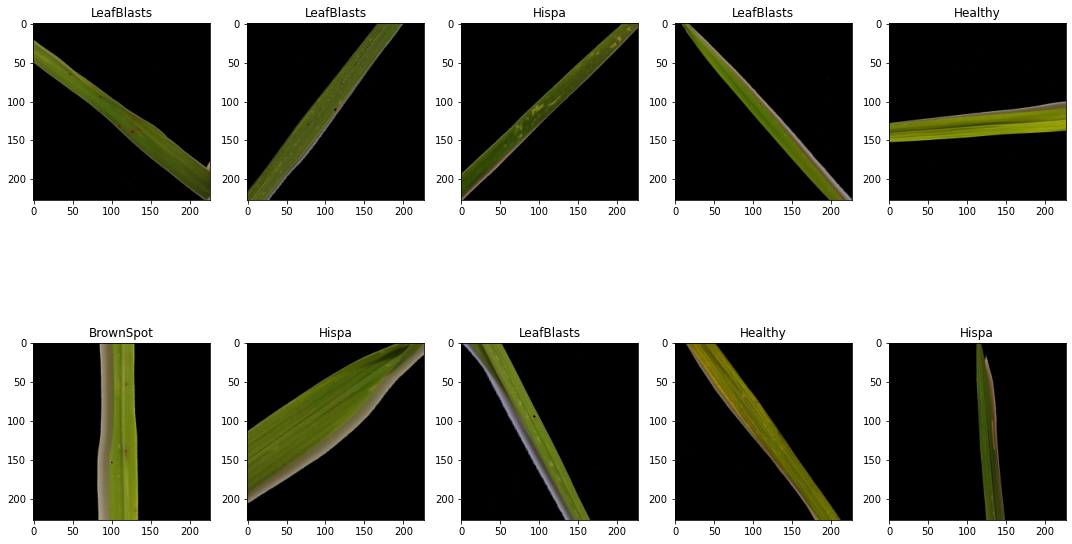

In [3]:
fig, axes = plt.subplots(2, 5, figsize = (15,10))
#TRUE LABEL of Training Data
for index in range(10):   
    ax = axes[index//5, index%5]
    ax.imshow(X_train[index])
    ax.set_title(classes[y_train[index]]) 
plt.tight_layout()
plt.show()

In [20]:
#Simple CNN model
model = Sequential()

#adding convolution layer
model.add(Conv2D(64,(3,3), strides=(2,2),activation='relu',input_shape=(227,227,3)))
model.add(BatchNormalization())
#adding pooling layer
model.add(MaxPool2D(pool_size = (2,2), strides = 2 ))

#adding fully connected layer
model.add(Flatten())
model.add(Dense(100,activation='relu'))

#adding output layer
model.add(Dense(4, activation='softmax'))

optimizer = tf.keras.optimizers.Adam(0.0001)
model.compile(loss = 'sparse_categorical_crossentropy', optimizer = optimizer, metrics= ['accuracy'])

model.fit(X_train, y_train, verbose = 1, batch_size = 32,epochs=5)

Epoch 1/5
50/50 [==============================] - 9s 178ms/step - loss: 0.9097 - accuracy: 0.6319
Epoch 2/5
50/50 [==============================] - 9s 175ms/step - loss: 0.8729 - accuracy: 0.6631
Epoch 3/5
50/50 [==============================] - 9s 183ms/step - loss: 0.8570 - accuracy: 0.6650
Epoch 4/5
50/50 [==============================] - 9s 182ms/step - loss: 0.8398 - accuracy: 0.6650
Epoch 5/5
50/50 [==============================] - 10s 190ms/step - loss: 0.8145 - accuracy: 0.6775


In [ ]:
#Checking parameters used in model
model.summary()

In [21]:
#Testing the model
model.evaluate(X_testing,y_testing)

14/14 [==============================] - 1s 57ms/step - loss: 1.9436 - accuracy: 0.2573


[1.9435856342315674, 0.2573363482952118]

In [ ]:
y_testing[:5]

In [ ]:
y_pred = model.predict(X_testing)
y_pred[:5]

In [25]:
#Two layered CNN Model
model2 = Sequential()

model2.add(Conv2D(filters = 32, kernel_size = (3,3), strides = (2,2), padding = 'same', input_shape = (227,227,3), data_format = 'channels_last'))

model2.add(Activation('relu'))
model2.add(MaxPool2D(pool_size =(2,2), strides = 2))

model2.add(Conv2D(filters = 64, kernel_size = (3,3), strides=(2,2), padding='same'))
model2.add(Activation('relu'))
model2.add(MaxPool2D(pool_size = (2,2), strides = 2 ))

model2.add(Flatten())
model2.add(Dense(64))
model2.add(Activation('relu'))

model2.add(Dropout(.1))

model2.add(Dense(4))
model2.add(Activation('softmax'))

optimizer = tf.keras.optimizers.Adam(0.0001)
model2.compile(loss = 'sparse_categorical_crossentropy', optimizer = optimizer, metrics= ['accuracy'])

model2.fit(X_train, y_train, verbose = 1, batch_size = 32,epochs=5)

Epoch 1/5
50/50 [==============================] - 9s 176ms/step - loss: 1.3436 - accuracy: 0.3150
Epoch 2/5
50/50 [==============================] - 9s 179ms/step - loss: 1.2618 - accuracy: 0.4013
Epoch 3/5
50/50 [==============================] - 9s 178ms/step - loss: 1.1927 - accuracy: 0.4563
Epoch 4/5
50/50 [==============================] - 9s 179ms/step - loss: 1.1145 - accuracy: 0.5219
Epoch 5/5
50/50 [==============================] - 10s 194ms/step - loss: 1.0570 - accuracy: 0.5506


In [23]:
#Testing the model
model2.evaluate(X_testing,y_testing, batch_size= 1)

443/443 [==============================] - 3s 6ms/step - loss: 1.6882 - accuracy: 0.2596


[1.6881519556045532, 0.259593665599823]

In [ ]:
#TRUE LABEL
y_testing[:10]

In [ ]:
#Predictions
y_pred = model2.predict(X_testing)
y_pred[:10]

In [ ]:
#PREDICTED LABEL
y_pred_labels = np.argmax(y_pred, axis = 1)
y_pred_labels[:10]

In [ ]:
#Count number of correct predictions
count_correct_predictions = 0

for i in range(0,len(y_testing)):
    if y_pred_labels[i] == y_testing[i]:
        count_correct_predictions += 1
print('No. of correct predictions: ',count_correct_predictions, 'out of ', len(y_testing))


In [12]:
#AlexNet CNN Model

model3 = Sequential()

model3.add(Conv2D(filters = 96, kernel_size = (11,11), strides = (4,4), padding = 'same', activation = 'relu', input_shape = (227,227,3), data_format = 'channels_last'))
model3.add(Lambda(tf.nn.lrn))
model3.add(MaxPool2D(pool_size =(3,3), strides = (2,2)))


model3.add(Conv2D(filters = 256, kernel_size = (5,5), strides=(1,1), padding='same', activation = 'relu'))
model3.add(Lambda(tf.nn.lrn))
# model2.add(BatchNormalization())
model3.add(MaxPool2D(pool_size =(3,3), strides = (2,2)))

model3.add(Conv2D(filters = 384, kernel_size = (3,3), strides=(1,1), padding='same', activation = 'relu'))
model3.add(Lambda(tf.nn.lrn))
# model2.add(BatchNormalization())
model3.add(Conv2D(filters = 384, kernel_size = (3,3), strides=(1,1), padding='same', activation = 'relu'))
model3.add(Lambda(tf.nn.lrn))
# model2.add(BatchNormalization())
model3.add(Conv2D(filters = 256, kernel_size = (3,3), strides=(1,1), padding='same', activation = 'relu'))
model3.add(Lambda(tf.nn.lrn))
# model2.add(BatchNormalization())
model3.add(MaxPool2D(pool_size = (3,3), strides = (2,2) ))

model3.add(Flatten())
model3.add(Dense(100, activation ='relu'))
model3.add(Dropout(0.5))

model3.add(Dense(100, activation ='relu'))
model3.add(Dropout(0.5))

model3.add(Dense(4, activation = 'softmax'))

optimizer = tf.keras.optimizers.Adam(0.0001)
model3.compile(loss = 'sparse_categorical_crossentropy', optimizer = optimizer, metrics= ['accuracy'])

model3.fit(X_train, y_train, verbose = 1, batch_size = 64,epochs=5)

Epoch 1/5
25/25 [==============================] - 104s 4s/step - loss: 1.3823 - accuracy: 0.2725
Epoch 2/5
25/25 [==============================] - 109s 4s/step - loss: 1.3743 - accuracy: 0.2981
Epoch 3/5
25/25 [==============================] - 111s 4s/step - loss: 1.3589 - accuracy: 0.3275
Epoch 4/5
25/25 [==============================] - 113s 5s/step - loss: 1.3026 - accuracy: 0.3787
Epoch 5/5
25/25 [==============================] - 106s 4s/step - loss: 1.2686 - accuracy: 0.3887


In [13]:
#Testing the model
model3.evaluate(X_testing,y_testing, batch_size= 1)

443/443 [==============================] - 13s 29ms/step - loss: 1.4520 - accuracy: 0.2912


[1.4520199298858643, 0.29119637608528137]

In [ ]:
fig, axes = plt.subplots(3, 5, figsize = (15,10))
#TRUE LABEL of Testing DATASET
for index in range(15):   
#     plt.figure(figsize = (15,2))
    ax = axes[index//5, index%5]
    ax.imshow(X_testing[index])
    ax.set_title(classes[y_testing[index]]) 
plt.tight_layout()
plt.show()

In [ ]:
fig, axes = plt.subplots(3, 5, figsize = (15,10))
#PREDICTED LABEL of Testing DATASET
for index in range(15):   
#     plt.figure(figsize = (15,2))
    ax = axes[index//5, index%5]
    ax.imshow(X_testing[index])
    ax.set_title(classes[y_pred_labels[index]]) 
plt.tight_layout()
plt.show()